# Stock Market Analysis

Author: [Tarun Jain](https://twitter.com/TRJ_0751)

A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment is usually made with an investment strategy in mind.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime
import mlflow

import warnings
warnings.filterwarnings("ignore")

2023-04-03 14:26:00.156503: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 14:26:02.729251: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-03 14:26:04.082214: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-03 14:26:04.082289: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
artifacts = "images"
if os.path.exists(artifacts):
    pass
else:
    os.makedirs(artifacts)

In [45]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [46]:
mlflow.tensorflow.autolog()

In [5]:
data = pd.read_csv('./s_p_stock/all_stocks_5yr.csv')

In [6]:
print(data.sample(7))

              date    open    high      low   close    volume Name
614944  2016-11-01   62.21   62.63   60.575   60.69  12111827  YUM
392179  2015-12-21   67.76   68.14   67.620   68.03    592324  MSI
341985  2016-08-18  138.29  139.04  138.045  138.71    519073   LH
93605   2014-04-16  117.11  117.55  115.890  116.89   1182452  BXP
479540  2014-03-12   49.82   50.19   49.640   50.18    647346  REG
130010  2015-06-30   31.75   31.90   31.540   31.84   4613087  CMS
128955  2016-04-21  115.36  116.64  114.610  115.14   1744815  CMI


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [10]:
data[data['Name'] == 'GOOGL']['Name'].shape

(1259,)

In [11]:
google = data[data['Name']== 'GOOGL'].reset_index()

In [12]:
apple = data[data['Name'] == 'AAPL'].reset_index()
facebook = data[data['Name'] == 'FB'].reset_index()

In [13]:
amd = data[data['Name'] == 'AMD'].reset_index()

In [14]:
amd.shape

(1259, 8)

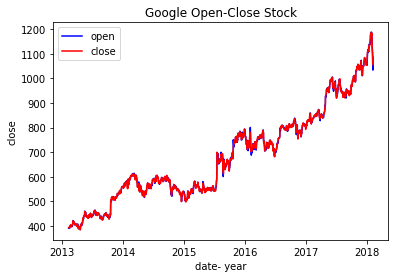

In [28]:
plt.plot(google['date'],google['open'],color="blue",label="open")
plt.plot(google['date'],google['close'],color="red",label="close")
plt.title("Google Open-Close Stock")
plt.xlabel("date- year")
plt.ylabel("close")
plt.legend()
plt.savefig("images/google_open_close.jpg")

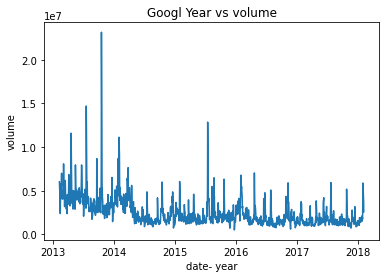

In [29]:
plt.plot(google['date'],google['volume'])
plt.xlabel("date- year")
plt.ylabel("volume")
plt.title("Googl Year vs volume")
plt.savefig("images/google_volume.jpg")

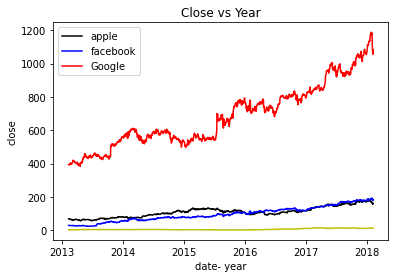

In [35]:
plt.plot(apple['date'],apple['close'],c="k",label="apple")
plt.plot(facebook['date'],facebook['close'],c="b",label="facebook")
plt.plot(google['date'],google['close'],c="r",label="Google")
plt.plot(amd['date'],amd['close'],c="y")
plt.xlabel("date- year")
plt.ylabel("close")
plt.legend()
plt.title("Close vs Year")
plt.savefig("images/close.jpg")

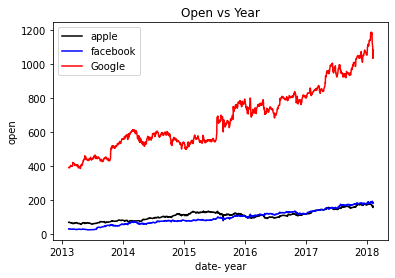

In [36]:
plt.plot(apple['date'],apple['open'],c="k",label="apple")
plt.plot(facebook['date'],facebook['open'],c="b",label="facebook")
plt.plot(google['date'],google['open'],c="r",label="Google")
plt.xlabel("date- year")
plt.ylabel("open")
plt.title("Open vs Year")
plt.legend()
plt.savefig("images/open.jpg")

In [49]:
experiment_name = 'Stock_Market'
try:
    exp_id = mlflow.create_experiment(name=experiment_name)
except:
    exp_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

In [37]:
data['close'].pct_change()

0              NaN
1        -0.019661
2        -0.013140
3         0.027330
4        -0.045703
            ...   
619035    0.014206
619036   -0.013364
619037   -0.038421
619038   -0.007585
619039    0.008052
Name: close, Length: 619040, dtype: float64

## Check the Top Stocks

In [38]:
data.sample(10)

,date,open,high,low,close,volume,Name
70270,2017-10-11,168.70,170.30,162.460,165.06,837688,AYI
106620,2015-12-22,54.40,54.49,53.345,54.27,4726733,CCL
145461,2017-03-14,33.94,34.14,33.840,34.12,14578391,CSCO
11621,2014-04-04,43.59,43.66,43.030,43.05,4416020,ADM
448622,2017-02-08,37.01,37.10,36.840,36.97,2070423,PGR
231951,2016-02-04,38.49,41.15,37.750,40.31,2438584,FLS
69481,2014-08-25,122.42,123.28,121.470,122.08,219362,AYI
289338,2013-07-12,86.55,87.25,85.410,85.53,1005659,HUM
138523,2014-04-22,74.69,74.69,73.940,74.17,5092504,COP
93028,2016-12-29,39.48,39.67,39.300,39.49,1004338,BWA


In [39]:
companies = ['AAPL','AMD','FB','GOOGL','AMZN','NVDA','EBAY','CSCO','IBM']

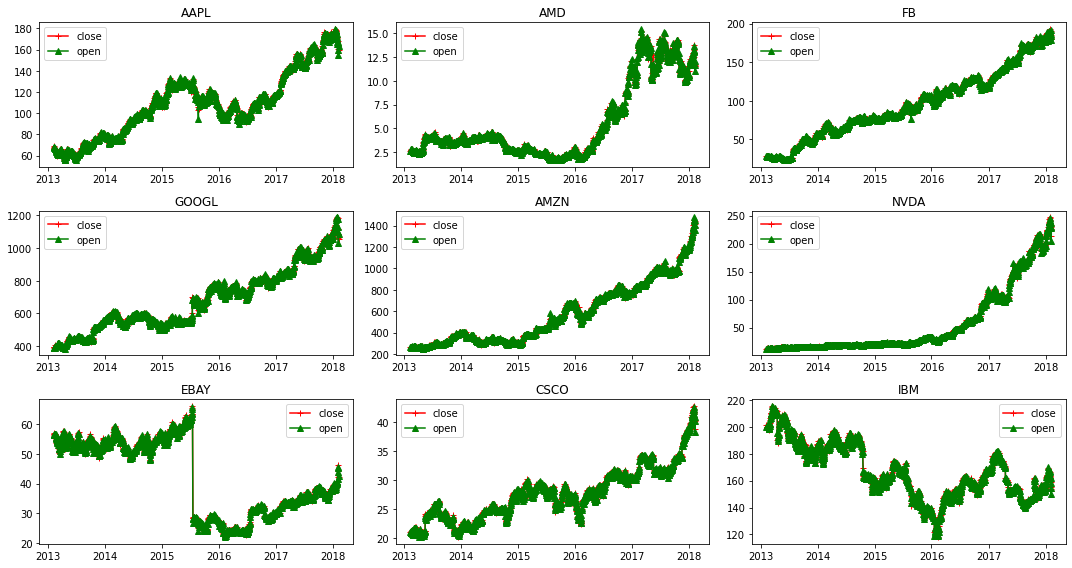

In [40]:
plt.figure(figsize=(15,8))
for index,company in enumerate(companies,1):
    plt.subplot(3,3,index)
    c = data[data['Name'] == company]
    plt.plot(c['date'],c['close'],c="r",label="close",marker="+")
    plt.plot(c['date'],c['open'],c="g",label="open",marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()
plt.savefig("images/companies_open_close.jpg")

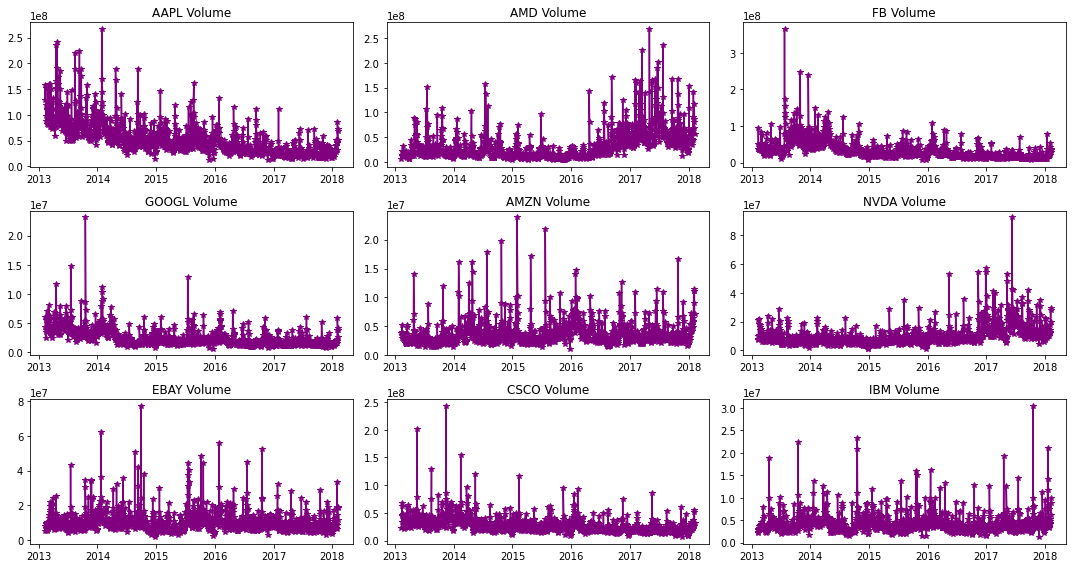

In [41]:
plt.figure(figsize=(15,8))
for index,company in enumerate(companies,1):
    plt.subplot(3,3,index)
    c = data[data['Name'] == company]
    plt.plot(c['date'],c['volume'],c='purple',marker='*')
    plt.title(f"{company} Volume")
    plt.tight_layout()
plt.savefig("images/companies_volume.jpg")

In [64]:
ma_day = [10, 20, 50]

l = []
for company in companies:
    df = data[data['Name'] == company]
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        df[column_name] = df['close'].rolling(ma).mean()
    l.append(df)
    
days_df = pd.DataFrame(l[0])
for i in l[1:]:
    days_df = pd.concat([days_df,i],axis=0)

In [67]:
days_df.head(8)

,date,open,high,low,close,volume,Name,MA for 10 days,MA for 20 days,MA for 50 days
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
1264,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,NaN,NaN,NaN
1265,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,NaN,NaN,NaN
1266,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,NaN,NaN,NaN


In [59]:
for i in l[1:]:
    days_df = pd.concat([days_df,i],axis=0)

In [60]:
days_df.reset_index(inplace=True)

In [61]:
days_df.drop('index',inplace=True,axis=1)

In [62]:
days_df['date'] = pd.to_datetime(days_df['date'])

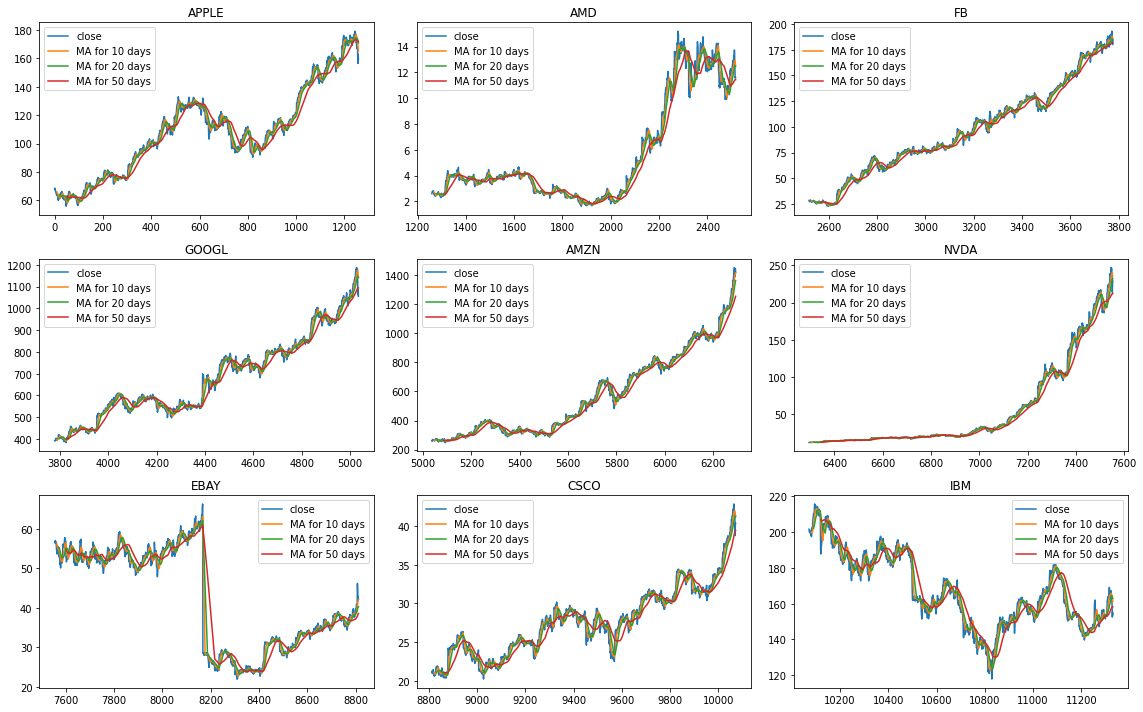

In [63]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(10)
fig.set_figwidth(16)

days_df[days_df['Name'] == 'AAPL'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

days_df[days_df['Name'] == 'AMD'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMD')

days_df[days_df['Name'] == 'FB'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('FB')

days_df[days_df['Name'] == 'GOOGL'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('GOOGL')

days_df[days_df['Name'] == 'AMZN'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMZN')

days_df[days_df['Name'] == 'NVDA'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('NVDA')

days_df[days_df['Name'] == 'EBAY'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('EBAY')

days_df[days_df['Name'] == 'CSCO'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('CSCO')

days_df[days_df['Name'] == 'IBM'][['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,2])
axes[2,2].set_title('IBM')

fig.tight_layout()

In [33]:
days_df.corr()

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days
open,1.000000,0.999955,0.999935,0.999896,-0.347034,0.999609,0.999158,0.997810
high,0.999955,1.000000,0.999918,0.999946,-0.346660,0.999597,0.999143,0.997787
low,0.999935,0.999918,1.000000,0.999954,-0.347582,0.999544,0.999089,0.997747
close,0.999896,0.999946,0.999954,1.000000,-0.347141,0.999541,0.999087,0.997743
volume,-0.347034,-0.346660,-0.347582,-0.347141,1.000000,-0.348319,-0.349996,-0.354152
MA for 10 days,0.999609,0.999597,0.999544,0.999541,-0.348319,1.000000,0.999763,0.998563
MA for 20 days,0.999158,0.999143,0.999089,0.999087,-0.349996,0.999763,1.000000,0.999215
MA for 50 days,0.997810,0.997787,0.997747,0.997743,-0.354152,0.998563,0.999215,1.000000


In [22]:
data_copy = data.copy()

In [23]:
data['date'] = pd.to_datetime(data['date'])

In [24]:
apple = data[data['Name'] == 'AAPL']

In [25]:
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1)) & (apple['date']<datetime(2018,1,1))]

In [26]:
prediction_range['close']

1259     67.8542
1260     68.5614
1261     66.8428
1262     66.7156
1263     66.6556
          ...   
2487    175.0100
2488    170.5700
2489    170.6000
2490    171.0800
2491    169.2300
Name: close, Length: 1233, dtype: float64

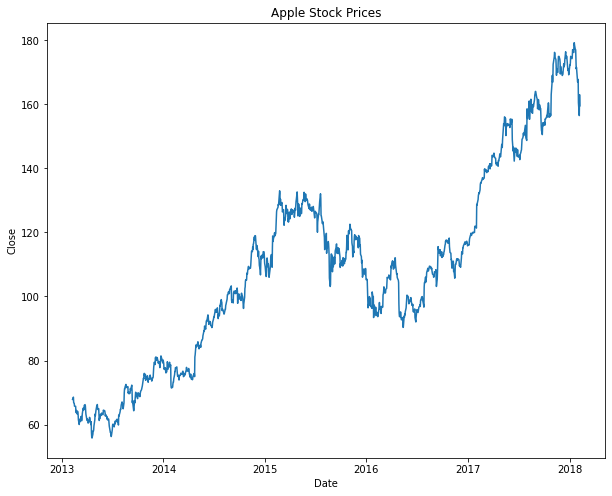

In [27]:
plt.figure(figsize=(10,8))
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.savefig("images/data_input.jpg")

In [28]:
close_data = apple.filter(['close'])
dataset = close_data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1197

In [29]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0977103 ],
       [0.103438  ],
       [0.08951884],
       ...,
       [0.81558288],
       [0.86855117],
       [0.84028522]])

In [30]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.0977103 , 0.103438  , 0.08951884, 0.08848863, 0.08800268,
       0.08056363, 0.08036683, 0.06747788, 0.06424956, 0.06974563,
       0.0604778 , 0.06761637, 0.06252526, 0.05885797, 0.046212  ,
       0.03415564, 0.04699113, 0.04064871, 0.04634158, 0.04765769,
       0.05477358, 0.0438511 , 0.04375877, 0.04856074, 0.06147237,
       0.07542636, 0.07400334, 0.07121481, 0.07196641, 0.08258842,
       0.08452006, 0.08169265, 0.07121481, 0.06031582, 0.0444067 ,
       0.04542719, 0.04797032, 0.04302985, 0.03780024, 0.04128287,
       0.04217377, 0.05225152, 0.05067786, 0.0454361 , 0.033924  ,
       0.0413177 , 0.01419696, 0.00175913, 0.        , 0.00941847,
       0.01804971, 0.01727706, 0.02065277, 0.03086415, 0.04580704,
       0.06045431, 0.0564169 , 0.06362512, 0.06878507, 0.08119942])]
[0.0788255618161805]

[array([0.0977103 , 0.103438  , 0.08951884, 0.08848863, 0.08800268,
       0.08056363, 0.08036683, 0.06747788, 0.06424956, 0.06974563,
       0.0604778 , 0.06761637, 0.062

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mms = MinMaxScaler()

In [34]:
data = mms.fit_transform(apple['close'].values.reshape(-1,1))

In [35]:
len(data)

1259

In [36]:
prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days, len(data)):
    x_train.append(data[x - prediction_days:x, 0])
    y_train.append(data[x, 0])

In [37]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [38]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units = 64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(keras.layers.LSTM(units= 64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

In [71]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train,y_train,epochs=15)

2023/04/03 15:14:53 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '42b9285a7d294734affc152ba6e7a4c9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/15
38/38 [==============================] - 4s 31ms/step - loss: 0.0024
Epoch 2/15
38/38 [==============================] - 1s 37ms/step - loss: 0.0023
Epoch 3/15
38/38 [==============================] - 1s 35ms/step - loss: 0.0022
Epoch 4/15
38/38 [==============================] - 1s 38ms/step - loss: 0.0023
Epoch 5/15
38/38 [==============================] - 1s 35ms/step - loss: 0.0024
Epoch 6/15
38/38 [==============================] - 1s 37ms/step - loss: 0.0023
Epoch 7/15
38/38 [==============================] - 1s 35ms/step - loss: 0.0021
Epoch 8/15
38/38 [==============================] - 1s 37ms/step - loss: 0.0024
Epoch 9/15
38/38 [==============================] - 1s 36ms/step - loss: 0.0021
Epoch 10/15
38/38 [==============================] - 1s 38ms/step - loss: 0.0022
Epoch 11/15
38/38 [==============================] - 1s 39ms/step - loss: 0.0020
Epoch 12/15
38/38 [==============================] - 1s 38ms/step - loss: 0.0021
Epoch 13/15
38/38 [==================

1/1 [==============================] - 1s 544ms/step


INFO:tensorflow:Assets written to: /tmp/tmp8ept59f9/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp8ept59f9/model/data/model/assets


In [73]:
with mlflow.start_run(experiment_id=exp_id):
    mlflow.log_artifacts('images') #to save a snapshot of the result
    test_data = scaled_data[training_data_len - 60: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    # Convert the data to a numpy array
    x_test = np.array(x_test)

    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Get the root mean squared error (RMSE)
    mse = np.mean(((predictions - y_test) ** 2))
    print("MSE",mse)
    print("RMSE",np.sqrt(mse))
    mlflow.log_metric('mse', mse)
    mlflow.log_metric("rmse",np.sqrt(mse))

2/2 [==============================] - 0s 14ms/step
MSE 10.133114347434528
RMSE 3.183255306668714


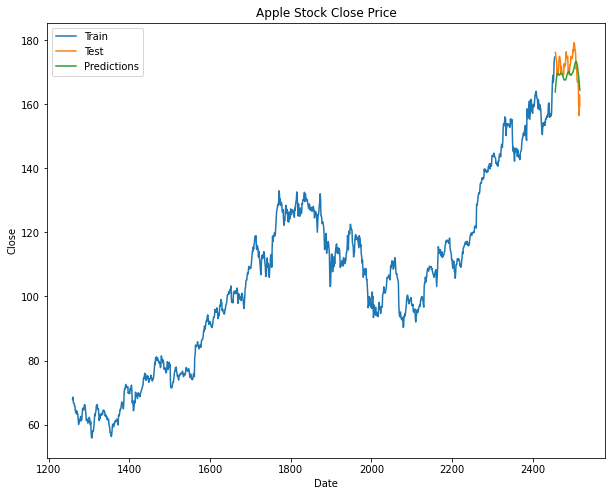

In [57]:
train = apple[:training_data_len]
test = apple[training_data_len:]
test['Predictions'] = predictions

plt.figure(figsize=(10,8))
plt.plot(train['close'])
plt.plot(test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.savefig("images/data_output.jpg")

In [67]:
!mlflow ui

[2023-04-03 15:10:26 +0530] [20232] [INFO] Starting gunicorn 20.1.0
[2023-04-03 15:10:26 +0530] [20232] [INFO] Listening at: http://127.0.0.1:5000 (20232)
[2023-04-03 15:10:26 +0530] [20232] [INFO] Using worker: sync
[2023-04-03 15:10:26 +0530] [20233] [INFO] Booting worker with pid: 20233
[2023-04-03 15:10:26 +0530] [20234] [INFO] Booting worker with pid: 20234
[2023-04-03 15:10:26 +0530] [20235] [INFO] Booting worker with pid: 20235
[2023-04-03 15:10:26 +0530] [20236] [INFO] Booting worker with pid: 20236
^C
[2023-04-03 15:10:59 +0530] [20232] [INFO] Handling signal: int
[2023-04-03 15:10:59 +0530] [20236] [INFO] Worker exiting (pid: 20236)
[2023-04-03 15:10:59 +0530] [20234] [INFO] Worker exiting (pid: 20234)
[2023-04-03 15:10:59 +0530] [20235] [INFO] Worker exiting (pid: 20235)
[2023-04-03 15:10:59 +0530] [20233] [INFO] Worker exiting (pid: 20233)
